<a href="https://colab.research.google.com/github/Foco22/Machine-Learning-and-Big-Data-UC/blob/master/Python%20para%20ML/Miniproyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ejemplo_data.csv to ejemplo_data (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['ejemplo_data.csv']))

**Lectura y análisis exploratorio de datos**

In [ ]:
df = pd.read_csv('ejemplo_data.csv')
df.head()

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes


In [ ]:
df['ID'] = df['ID'].astype('int')

In [ ]:
df['Activo'] = df['Activo'].replace('n',0)
df['Activo'] = df['Activo'].astype('int')
df['Activo'] = df['Activo'].apply(lambda x : True if x == 1 else False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 470.0+ bytes


In [ ]:
df['Unidades'] = df['Unidades'].replace('No',0)
df['Unidades'] = df['Unidades'].astype('int')

In [ ]:
def convertir_monto(df):
    data = df.replace(',','').replace('$','')
    return data

In [ ]:
df['2016'] = df['2016'].apply(convertir_monto)
df['2016'] = df['2016'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6 non-null      int64  
 1   Nombre       6 non-null      object 
 2   2016         6 non-null      float64
 3   2017         6 non-null      object 
 4   Crecimiento  6 non-null      object 
 5   Unidades     6 non-null      int64  
 6   fecha        6 non-null      object 
 7   Activo       6 non-null      bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 470.0+ bytes


**Estadísticas descriptivas**

In [ ]:
import random as random
nombre = ['Francisco','Macaya','Matas','Daniela','Daniel','Sandra','Pilar','Jaime','Juan Pablo','Nicolas',
          'Jorge','Gallardo','Andres','Rodolfo','Ulises','Italo','Jenifer','Geraldine','Barbara','Marta']

edad = random.sample(range(10,80), 20)

nota1 = random.sample(range(0, 10), 10)
nota2 = random.sample(range(0, 10), 10)
nota  = nota1 + nota2

In [ ]:
dicc = {'Nombre': nombre , 'Edad': edad ,'Nota': nota}

df = pd.DataFrame(dicc)
df.head()

,Nombre,Edad,Nota
0,Francisco,66,2
1,Macaya,18,9
2,Matas,25,7
3,Daniela,27,4
4,Daniel,23,0


Tendencia Central:


In [ ]:
print('La mediana y media para la columna Edad son:')
print('Media: {}'.format(df['Edad'].mean()))
print('Mediana:{}'.format(df['Edad'].median()))

La mediana y media para la columna Edad son:
Media: 40.9
Mediana:42.0


In [ ]:
print('La mediana y media para la columna Nota son:')
print('Media: {}'.format(df['Nota'].mean()))
print('Mediana:{}'.format(df['Nota'].median()))

La mediana y media para la columna Nota son:
Media: 4.5
Mediana:4.5


Dispersion:

In [ ]:
print('La varianza para la columna Edad es:')
print('Varianza: {}'.format(round(df['Edad'].var(),2)))
print('\n')
print('La desviacion Estandar para la columna Edad es:')
print('Desviacion Estandar: {}'.format(round(df['Edad'].std(),2)))

La varianza para la columna Edad es:
Varianza: 368.52


La desviacion Estandar para la columna Edad es:
Desviacion Estandar: 19.2


In [ ]:
print('La Varianza para la columna nota es:')
print('Varianza: {}'.format(round(df['Nota'].var(),2)))
print('\n')
print('La desviacion estandar para la columna nota es:')
print('Desviacion Estandar: {}'.format(round(df['Nota'].std(),2)))

La Varianza para la columna nota es:
Varianza: 8.68


La desviacion estandar para la columna nota es:
Desviacion Estandar: 2.95


**Transformación e imputación de datos**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ejemplo_data2.csv to ejemplo_data2 (1).csv


In [ ]:
df = pd.read_csv('ejemplo_data2.csv')

In [ ]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df['Car'] = df['Car'].fillna(df['Car'].mean()) 
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())

In [ ]:
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])

In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
#REGIONNAME
dummy = pd.get_dummies(df['Regionname'])
df = pd.concat([df,dummy],axis = 1)

In [ ]:
#TYPE
dummy = pd.get_dummies(df['Type'])
df = pd.concat([df,dummy],axis = 1) 

In [ ]:
#METHOD
dummy = pd.get_dummies(df['Method'])
df = pd.concat([df,dummy],axis = 1) 

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u,PI,S,SA,SP,VB
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


**Visualización de datos**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mean = [0,0]
cov = [[1,0],[0,100]] 
x = np.random.multivariate_normal(mean,cov,5000)

df = pd.DataFrame(x,columns = ['Datos A','Datos B'])

<Figure size 720x576 with 0 Axes>

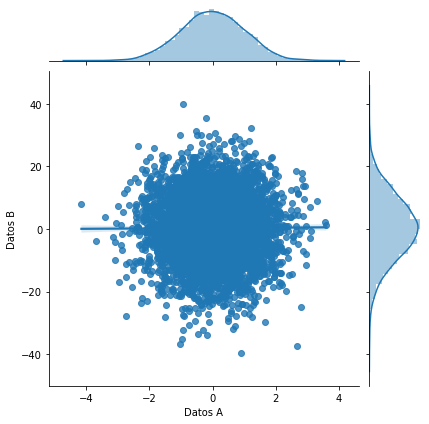

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.jointplot(x = 'Datos A', y = 'Datos B' , data = df, kind="reg")

Text(0.5, 1.0, 'Analisis de distribucion de los Datos A')

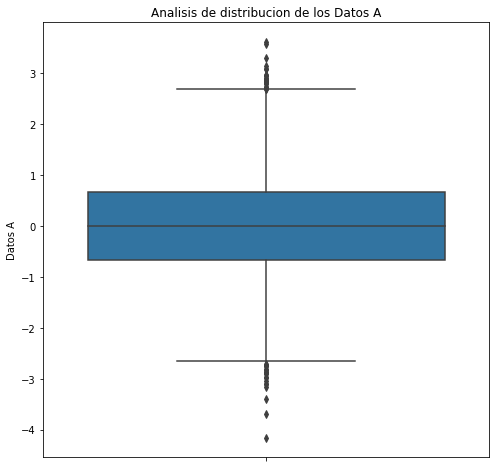

In [ ]:
#Datos A
plt.figure(figsize=(8,8))
ax = sns.boxplot(y = 'Datos A', data=df)
plt.title('Analisis de distribucion de los Datos A')

Text(0.5, 1.0, 'Analisis de distribucion de los Datos B')

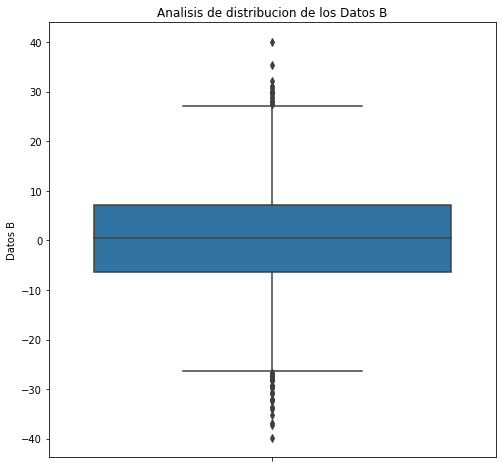

In [ ]:
#Datos B
plt.figure(figsize=(8,8))
ax = sns.boxplot(y = 'Datos B', data=df)
plt.title('Analisis de distribucion de los Datos B')